In [35]:
from itertools import product

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pop_tools
import xpersist as xp

import util

In [36]:
clobber = False

## Get the model grid and generate region mask
Where we are using the [pop_tools](https://pop-tools.readthedocs.io/en/latest/examples/get-model-grid.html) package. This reads the same binary files that the model read to generate the grid online.

In [37]:
grid = pop_tools.get_grid('POP_gx1v6')
grid

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 320, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    TLAT         (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG        (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
    ULAT         (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    ULONG        (nlat, nlon) float64 321.1 322.3 323.4 ... 319.2 319.6 320.0
    DXT          (nlat, nlon) float64 1.894e+06 1.893e+06 ... 1.473e+06
    DYT          (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.046e+06 5.046e+06
    DXU          (nlat, nlon) float64 2.397e+06 2.397e+06 ... 1.391e+06
    DYU          (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.493e+06 5.493e+06
    TAREA        (nlat, nlon) float64 1.125e+13 1.125e+13 ... 7.432e+12
    UAREA        (nlat, nlon) float64 1.423e+13 1.423e+13 ... 7.639e+12
    KMT          (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    REGION_MASK  (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    dz           (z_t) float64 1e+03 1e+03 1e+03 ... 2.499e+04 2.5e+04 2.5e+04
Attributes:
    lateral_dims:         [384, 320]
    vertical_dims:        60
    vert_grid_file:       gx1v7_vert_grid
    horiz_grid_fname:     inputdata/ocn/pop/gx1v6/grid/horiz_grid_20010402.ie...
    topography_fname:     inputdata/ocn/pop/gx1v6/grid/topography_20090204.ie...
    region_mask_fname:    inputdata/ocn/pop/gx1v6/grid/region_mask_20090205.i...
    type:                 dipole
    region_mask_regions:  {'Caspian Sea': -14, 'Black Sea': -13, 'Baltic Sea'...
    title:                POP_gx1v6 grid

In [38]:
jnx = np.where(grid.TLAT[:, 0] <= -30)[0]
lat_slice = slice(jnx[0], jnx[-1]+1)
grid = grid.isel(nlat=lat_slice)
grid

<xarray.Dataset>
Dimensions:      (nlat: 93, nlon: 320, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    TLAT         (nlat, nlon) float64 -79.22 -79.22 -79.22 ... -30.08 -30.08
    TLONG        (nlat, nlon) float64 320.6 321.7 322.8 ... 317.2 318.3 319.4
    ULAT         (nlat, nlon) float64 -78.95 -78.95 -78.95 ... -29.82 -29.82
    ULONG        (nlat, nlon) float64 321.1 322.3 323.4 ... 317.8 318.9 320.0
    DXT          (nlat, nlon) float64 1.894e+06 1.893e+06 ... 1.082e+07
    DYT          (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.864e+06 5.864e+06
    DXU          (nlat, nlon) float64 2.397e+06 2.397e+06 ... 1.085e+07
    DYU          (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.842e+06 5.842e+06
    TAREA        (nlat, nlon) float64 1.125e+13 1.125e+13 ... 6.346e+13
    UAREA        (nlat, nlon) float64 1.423e+13 1.423e+13 ... 6.339e+13
    KMT          (nlat, nlon) int32 0 0 0 0 0 0 0 0 ... 35 44 49 52 53 53 53 54
    REGION_MASK  (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 6 6 6 6 6 6 6 6 6
    dz           (z_t) float64 1e+03 1e+03 1e+03 ... 2.499e+04 2.5e+04 2.5e+04
Attributes:
    lateral_dims:         [384, 320]
    vertical_dims:        60
    vert_grid_file:       gx1v7_vert_grid
    horiz_grid_fname:     inputdata/ocn/pop/gx1v6/grid/horiz_grid_20010402.ie...
    topography_fname:     inputdata/ocn/pop/gx1v6/grid/topography_20090204.ie...
    region_mask_fname:    inputdata/ocn/pop/gx1v6/grid/region_mask_20090205.i...
    type:                 dipole
    region_mask_regions:  {'Caspian Sea': -14, 'Black Sea': -13, 'Baltic Sea'...
    title:                POP_gx1v6 grid

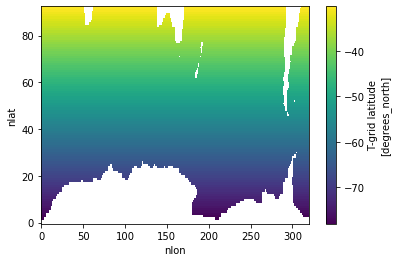

In [39]:
grid.TLAT.where(grid.KMT>0).plot();

In [40]:
# define a list of tuples describing our regions: (region_name, logical_array)
so_logic = (grid.TLAT <= -45)
mask_logic = [
    ('Southern Ocean', so_logic), 
    ('WAP & Atlantic', so_logic & ((grid.TLONG > 260) | (grid.TLONG < 25))),
    ('Atlantic Quadrant', so_logic & ((grid.TLONG > 270) | (grid.TLONG < 0)))  
]

# create a region coordinate with the region names
region = xr.DataArray(
    [t[0] for t in mask_logic], 
    dims=('region'), 
)
nregion = len(region)


# create a masked array array
masked_area = xr.DataArray(
    np.zeros((nregion,)+grid.TLAT.shape), 
    dims=('region',)+grid.TLAT.dims,
    coords={'region': region},
    name='masked_area',
)
for i, name_logic in enumerate(mask_logic):
    masked_area.data[i, :, :] = grid.TAREA.where(name_logic[1]).fillna(0.).where(grid.KMT>0)

# subset to the lat range from above
masked_area = masked_area.isel(nlat=lat_slice)
masked_area    

<xarray.DataArray 'masked_area' (region: 3, nlat: 93, nlon: 320)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [1.52530781e+13, 1.52530781e+13, 1.52530781e+13, ...,
                    nan,            nan,            nan],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [1.52530781e+13, 1.52530781e+13, 1.52530781e+13, ...,
                    nan,            nan,            nan],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [1.52530781e+13, 1.52530781e+13, 1.52530781e+13, ...,
                    nan,            nan,            nan],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]])
Coordinates:
  * region   (region) <U17 'Southern Ocean' 'WAP & Atlantic' 'Atlantic Quadrant'
Dimensions without coordinates: nlat, nlon

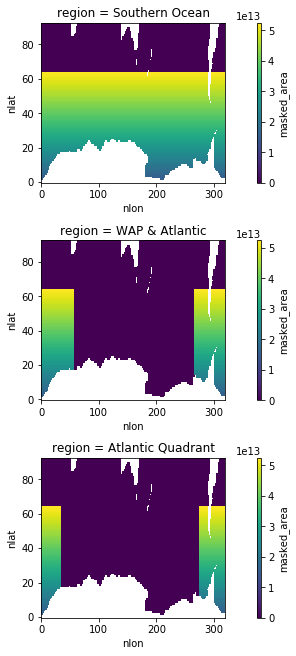

In [41]:
ncol = int(np.sqrt(nregion))
nrow = int(nregion/ncol) + min(1, nregion%ncol)

fig, ax = plt.subplots(nrow, ncol, figsize=(4*ncol, 3*nrow),
                       constrained_layout=True)

for i, region in enumerate(masked_area.region.values):
    plt.axes(ax.ravel()[i])
    masked_area.sel(region=region).plot()    

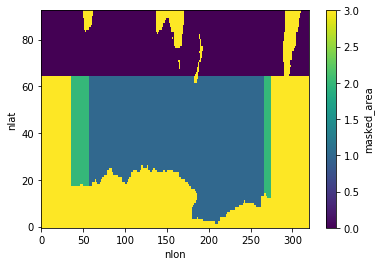

In [42]:
masked_area.where(masked_area==0).fillna(1.).sum('region').plot();

## Open Global Dataset for Chl

In [43]:
ds_djf_obs_chl = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/seawifs_mapped_monthly_chl_gsm_DJF.POP_gx1v6.zarr')
ds_djf_obs_chl

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 12)
Coordinates:
    TLAT     (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    TLONG    (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
  * time     (time) int64 1998 1999 2000 2001 2002 ... 2005 2006 2007 2009 2010
Dimensions without coordinates: nlat, nlon
Data variables:
    KMT      (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    TAREA    (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    chl_gsm  (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>

In [44]:
# rename vars
ds_djf_obs_chl['Chl_surf'] = ds_djf_obs_chl['chl_gsm'] 
ds_djf_obs_chl['TAREA_C'] = ds_djf_obs_chl['TAREA'] 
ds_djf_obs_chl

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, time: 12)
Coordinates:
    TLAT      (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    TLONG     (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
  * time      (time) int64 1998 1999 2000 2001 2002 ... 2005 2006 2007 2009 2010
Dimensions without coordinates: nlat, nlon
Data variables:
    KMT       (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    TAREA     (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    chl_gsm   (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    Chl_surf  (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    TAREA_C   (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>

### Clip it to SO

In [45]:
grid_vars = ['KMT', 'TAREA_C', 'TLAT', 'TLONG', 'time']
data_vars = ['Chl_surf']

ds_obs_chl = ds_djf_obs_chl[data_vars+grid_vars].isel(nlat=lat_slice)
ds_obs_chl

<xarray.Dataset>
Dimensions:   (nlat: 93, nlon: 320, time: 12)
Coordinates:
    TLAT      (time, nlat, nlon) float64 dask.array<chunksize=(1, 93, 320), meta=np.ndarray>
    TLONG     (time, nlat, nlon) float64 dask.array<chunksize=(1, 93, 320), meta=np.ndarray>
  * time      (time) int64 1998 1999 2000 2001 2002 ... 2005 2006 2007 2009 2010
Dimensions without coordinates: nlat, nlon
Data variables:
    Chl_surf  (time, nlat, nlon) float64 dask.array<chunksize=(1, 93, 320), meta=np.ndarray>
    KMT       (time, nlat, nlon) float64 dask.array<chunksize=(1, 93, 320), meta=np.ndarray>
    TAREA_C   (time, nlat, nlon) float64 dask.array<chunksize=(1, 93, 320), meta=np.ndarray>

### Visually Check

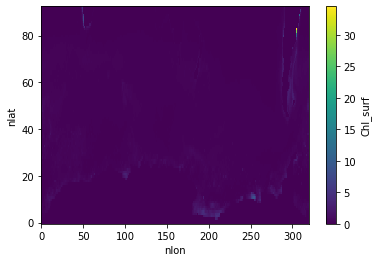

In [46]:
ds_obs_chl.Chl_surf.mean('time').plot()

___
## Open Global Dataset for SST

In [47]:
ds_djf_obs_sst = xr.open_zarr(f'{util.project_tmpdir}/oisst-avhrr-v02r01.1990-2019_DJF.POP_gx1v6.zarr')
ds_djf_obs_sst

,Array,Chunk
Bytes,28.51 MB,983.04 kB
Shape,"(29, 384, 320)","(1, 384, 320)"
Count,30 Tasks,29 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,28.51 MB,983.04 kB
Shape,"(29, 384, 320)","(1, 384, 320)"
Count,30 Tasks,29 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [48]:
# rename vars
ds_djf_obs_sst['SST'] = ds_djf_obs_sst['sst'] 
ds_djf_obs_sst['TAREA_T'] = ds_djf_obs_sst['TAREA'] 
ds_djf_obs_sst

,Array,Chunk
Bytes,28.51 MB,983.04 kB
Shape,"(29, 384, 320)","(1, 384, 320)"
Count,30 Tasks,29 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,28.51 MB,983.04 kB
Shape,"(29, 384, 320)","(1, 384, 320)"
Count,30 Tasks,29 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


### Clip it to SO

In [49]:
grid_vars = ['KMT', 'TAREA_T', 'TLAT', 'TLONG', 'time']
data_vars = ['anom', 'err','ice','SST']

ds_obs_sst = ds_djf_obs_sst[data_vars+grid_vars].isel(nlat=lat_slice)
ds_obs_sst

,Array,Chunk
Bytes,6.90 MB,238.08 kB
Shape,"(29, 93, 320)","(1, 93, 320)"
Count,59 Tasks,29 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,6.90 MB,238.08 kB
Shape,"(29, 93, 320)","(1, 93, 320)"
Count,59 Tasks,29 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


### Visually Check

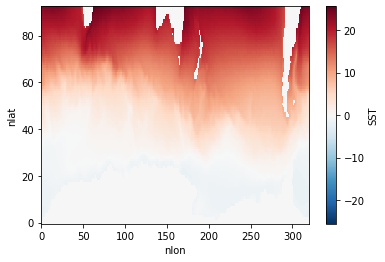

In [50]:
ds_obs_sst.SST.mean('time').plot()

## Merge Observational dataset

In [31]:
observations = xr.merge((ds_obs_sst, ds_obs_chl))

MergeError: conflicting values for variable 'TLAT' on objects to be combined. You can skip this check by specifying compat='override'.

In [53]:
test_combine = xr.combine_by_coords((ds_djf_obs_chl, ds_djf_obs_sst))

MergeError: conflicting values for variable 'TAREA' on objects to be combined. You can skip this check by specifying compat='override'.

In [56]:
def regional_means():
    
    ds_djf = ds_obs_sst
    
    dim = ['nlat', 'nlon']
    area_total = masked_area.sum(dim)
    weights = masked_area / area_total
    weights_sum = weights.sum(dim)

    # ensure that the weights add to 1.
    np.testing.assert_allclose(weights_sum.where(weights_sum != 0.).fillna(1.), 1.0, rtol=1e-7)

    with xr.set_options(keep_attrs=True):
        ds_djf_regional = (ds_djf[list(ds_djf.data_vars)] * weights).sum(dim).compute()

    return ds_djf_regional

ds_djf_regional_sst = regional_means()
ds_djf_regional_sst

<xarray.Dataset>
Dimensions:  (region: 3, time: 29)
Coordinates:
  * time     (time) int64 1991 1992 1993 1994 1995 ... 2015 2016 2017 2018 2019
  * region   (region) <U17 'Southern Ocean' 'WAP & Atlantic' 'Atlantic Quadrant'
Data variables:
    anom     (time, region) float64 -0.3425 -0.3742 -0.4097 ... -0.1969 -0.2326
    err      (time, region) float64 0.3491 0.2871 0.2869 ... 0.2593 0.2599
    ice      (time, region) float64 0.07561 0.1054 0.1343 ... 0.1408 0.1536
    SST      (time, region) float64 4.117 3.465 3.59 4.405 ... 4.368 3.642 3.767
    KMT      (time, region) float64 52.16 51.3 49.88 52.16 ... 52.16 51.3 49.88
    TAREA_T  (time, region) float64 4.065e+13 4.015e+13 ... 4.015e+13 3.978e+13

In [57]:
def regional_means():
    
    ds_djf = ds_obs_chl
    
    dim = ['nlat', 'nlon']
    area_total = masked_area.sum(dim)
    weights = masked_area / area_total
    weights_sum = weights.sum(dim)

    # ensure that the weights add to 1.
    np.testing.assert_allclose(weights_sum.where(weights_sum != 0.).fillna(1.), 1.0, rtol=1e-7)

    with xr.set_options(keep_attrs=True):
        ds_djf_regional = (ds_djf[list(ds_djf.data_vars)] * weights).sum(dim).compute()

    return ds_djf_regional

ds_djf_regional_chl = regional_means()
ds_djf_regional_chl

<xarray.Dataset>
Dimensions:   (region: 3, time: 12)
Coordinates:
  * time      (time) int64 1998 1999 2000 2001 2002 ... 2005 2006 2007 2009 2010
  * region    (region) <U17 'Southern Ocean' ... 'Atlantic Quadrant'
Data variables:
    Chl_surf  (time, region) float64 0.2566 0.3438 0.4067 ... 0.321 0.42 0.4476
    KMT       (time, region) float64 52.16 51.3 49.88 52.16 ... 52.16 51.3 49.88
    TAREA_C   (time, region) float64 4.065e+13 4.015e+13 ... 4.015e+13 3.978e+13

In [63]:
ds_djf_regional_chl.sel(region = 'Southern Ocean').Chl_surf.mean('time')

<xarray.DataArray 'Chl_surf' ()>
array(0.2787778)
Coordinates:
    region   <U17 'Southern Ocean'